# Аналитика крупного интернет магазина

Крупному интернет-магазину необходимо провести аналитику своей деятельности. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.

Следует приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Часть 1:  Приоритизация гипотез.
### Предобработка данных

Изучим данные из файла, который содержит в себе 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами *Reach*, *Impact*, *Confidence*, *Effort*

In [1]:
import pandas as pd 
from IPython.display import display
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('/datasets/hypothesis.csv')

Проверим таблицу на наличие пропусков и дубликатов, а также выведем основную информацию по ней. Для этого создадим функцию *df_info*, которую можно будет использовать и во второй части проекта. 

In [2]:
def df_info(df):
    print('Количесвто пропусков:')
    print(df.isnull().sum())
    print('')
    print('Количество дубликатов:')
    print(df.duplicated().sum())
    print('')
    print('информация о таблице:')
    print(df.info())
    
df_info(df)

Количесвто пропусков:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Количество дубликатов:
0

информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


Данные готовы к анализу.

### Применение фреймворков ICE и RICE

Создадим столбец *ICE*, который будем заполнять для каждой гипотезы согласно формуле: *ICE = (Impact * Confidence) / Efforts*

In [3]:
df['ICE'] = (df['Impact'] * df['Confidence'] / df['Efforts'])
df['ICE'] = np.round(df['ICE'])
df = df.sort_values(by='ICE', ascending=False)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
df[['Hypothesis', 'ICE']]

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


**Вывод:**

Наиболее перспективными оказались следующие гипотезы: "Запустить акцию, дающую скидку на товар в день рождения" с индексом 8, "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с индексом 0, "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с индексом 7. 

Проверим теперь фреймворк *RICE*, который посчитаем по формуле: *RICE = (Reach * Impact * Confidence) / Efforts*

In [4]:
df['RICE'] = (df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts'])
df['RICE'] = np.round(df['RICE'])
df = df.sort_values(by='RICE', ascending=False)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
df[['Hypothesis', 'RICE']]

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**

С учетом добавления параметра *Reach* в формулу, наиболее перспективными оказались следующие гипотезы: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с индексом 7, "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"с индексом 2, "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с индексом 0.

### Общий вывод

Объедеим результат в общую таблицу и проранжируем по фреймворку RICE. 

In [5]:
df[['Hypothesis', 'RICE', 'ICE']]

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0


При проведении приоритизаций гипотез фреймворки показали разные результаты, и если гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" встречаются в обоих вариантах, но на разных местах, то гипотезы "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и "Запустить акцию, дающую скидку на товар в день рождения" исключительно по одному разу, причем что, там где они не входят в ТОП-3, они занимают низкие позиции. 

Скорее всего это произошло в связи с тем, что добавился параметр *Reach*, который отвечает за охват пользователей, следовательно, вероятно, что у гипотезы "Запустить акцию, дающую скидку на товар в день рождения" слишком маленький охват, а у "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" напротив, большой. 

## Часть 2: Анализ A/B-теста

### Предобработка данных

Изучим данные из файлов, которые содержат в себе результаты проведенного A/B - теста, а также проверим таблицы на наличие пропусков и дубликатов по уже полученной ранее функции *df_info*:

In [6]:
df_orders = pd.read_csv('/datasets/orders.csv')
df_visits = pd.read_csv('/datasets/visitors.csv')

datas = [df_orders, df_visits]
names = ['таблица с заказами', 'таблица с визитами']

for i,j in zip(datas, names):
    print(j)
    print('')
    df_info(i)
    print('')

таблица с заказами

Количесвто пропусков:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество дубликатов:
0

информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

таблица с визитами

Количесвто пропусков:
date        0
group       0
visitors    0
dtype: int64

Количество дубликатов:
0

информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None



Единственная проблема, которая встретилась - неправильный формат даты у обоих таблиц, исправим это. 

In [7]:
for i in datas:
    i['date'] = pd.to_datetime(i['date'], format='%Y-%m-%d')

Однако также необходимо проверить, не попали ли пользователи одновременно в обе группы: сгрупируем пользователей по их айди и выведем соответствующие им количество групп, данный столбец должен содержать одно уникальное значение: "1", потому что каждому пользователю должна соответствовать всего одна группа. 

In [8]:
cheking = df_orders.groupby('visitorId')['group'].nunique()
cheking = cheking.reset_index()
cheking.columns = ['visitorId', 'amount_of_group']

Как оказалось, есть пользователи, которые попали в обе группы, исключим из таблицы *df_orders* таких пользователей

In [9]:
df_orders = df_orders.merge(cheking, on='visitorId')
df_orders = df_orders[df_orders['amount_of_group'] == 1]

Данные готовы к анализу. 

### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм *cumulativeData*

In [10]:
datesGroups = df_orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                                                                'group' : 'max', 
                                                                                                                                                'transactionId' : 'nunique', 
                                                                                                                                                'visitorId' : 'nunique', 
                                                                                                                                                'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'],df_visits['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                                                                 'group' : 'max', 
                                                                                                                                                 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 
                          'group', 
                          'orders', 
                          'buyers', 
                          'revenue', 
                          'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.rcParams['figure.figsize'] = (15, 10)

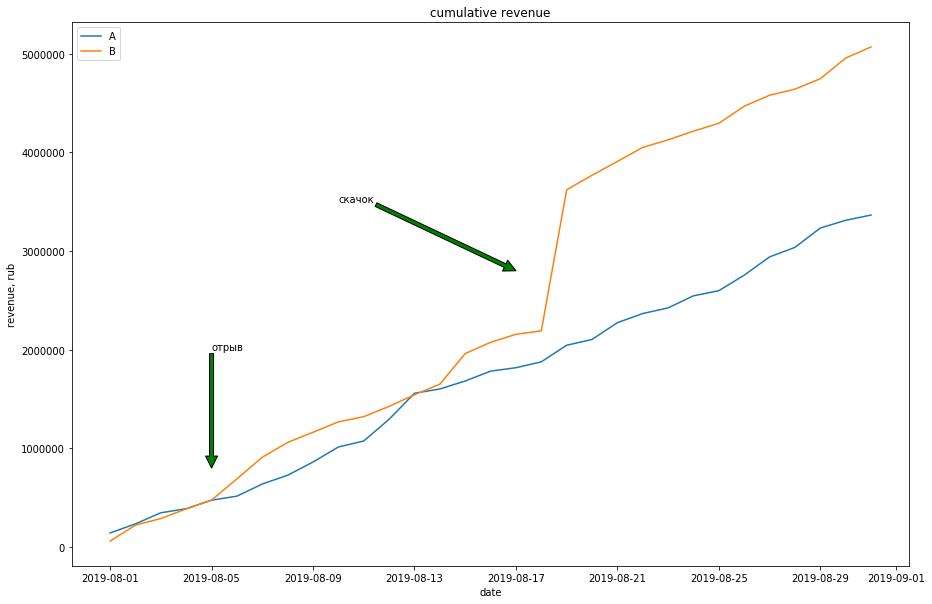

In [11]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('cumulative revenue')
plt.xlabel('date')
plt.ylabel('revenue, rub')
plt.legend() 

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))
plt.show()

**Вывод:**

Выручка почти равномерно увеличивается в течение всего теста.

Однако график выручки группы B в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

###  График кумулятивного среднего чека по группам

Text(2019-08-10, 8000, 'скачок')

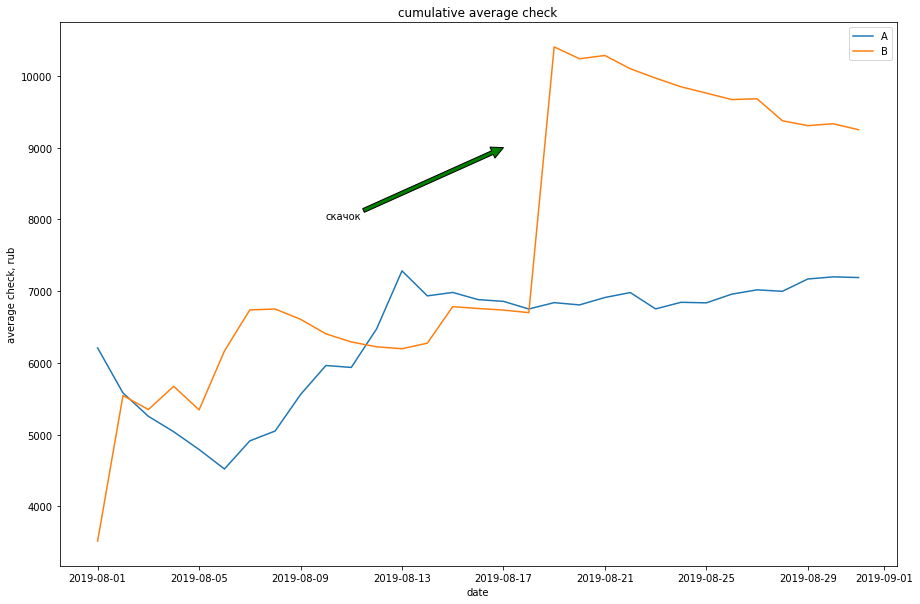

In [12]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('cumulative average check')
plt.xlabel('date')
plt.ylabel('average check, rub')
plt.legend() 
plt.annotate('скачок', xy=('2019-08-17', 9000), xytext=('2019-08-10', 8000),
            arrowprops=dict(facecolor='g'))

**Вывод:**

Средний чек для группы А становится равномерным ближе к концу теста, а для группы наблюдается спад. Возможно, в группу B в середине теста попали крупные заказы, о чем сигнализирует резкий всплеск на графике, тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека

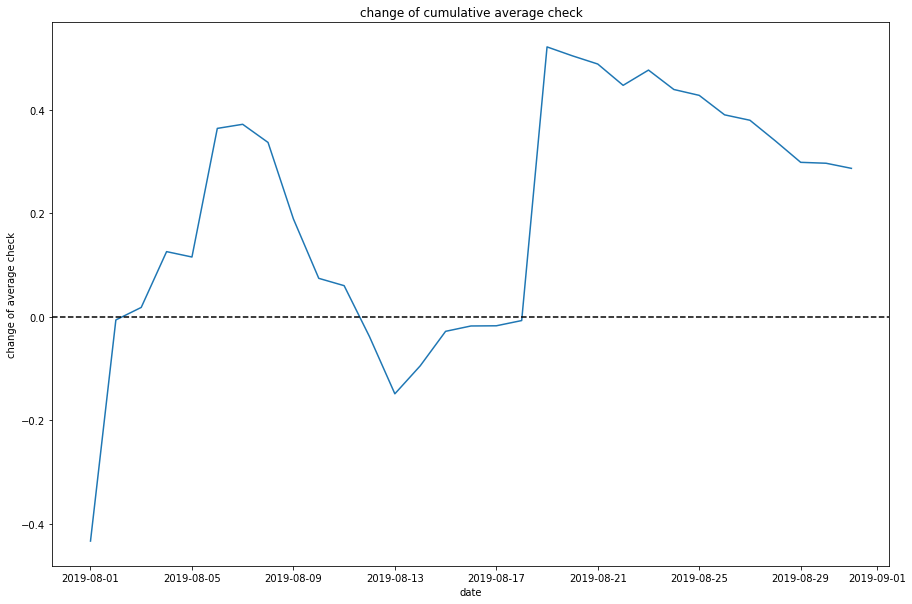

In [13]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date',
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('change of cumulative average check')
plt.xlabel('date')
plt.ylabel('change of average check')
plt.show()

**Вывод:**

Есть точки, в которых график различия между сегментами резко скачет, это означает наличие крупных заказов и выбросов.

###  График кумулятивной конверсии по группам

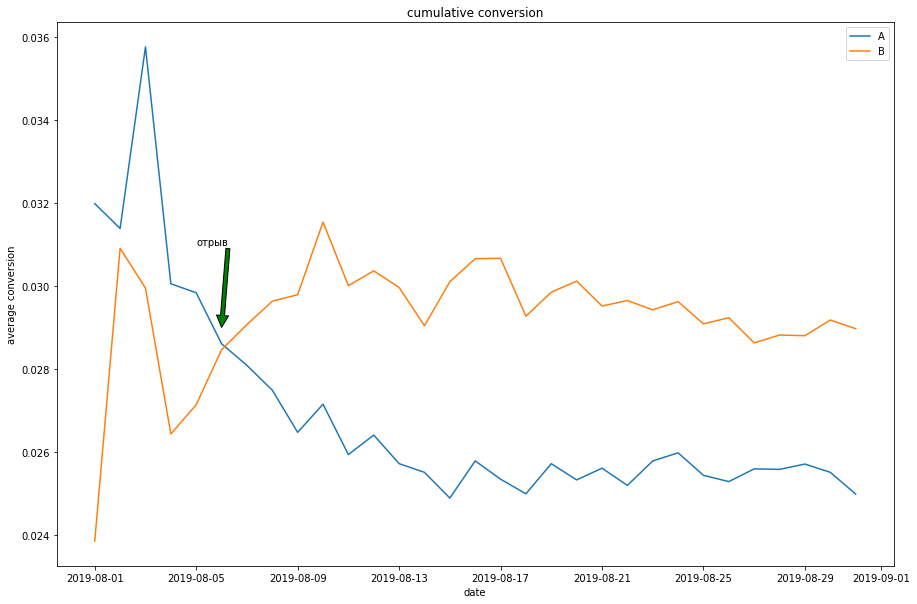

In [14]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('cumulative conversion')
plt.xlabel('date')
plt.ylabel('average conversion')
plt.legend()
plt.annotate('отрыв', xy=('2019-08-06', 0.029), xytext=('2019-08-05', 0.031),
            arrowprops=dict(facecolor='g'))
plt.show()

**Вывод:**

Полученный график симметричен. Kонверсия группы B сильно вырвалась вперёд и зафиксировалась, а конверсия группы A просела, но тоже зафиксировалась.

### График относительного изменения кумулятивной конверсии

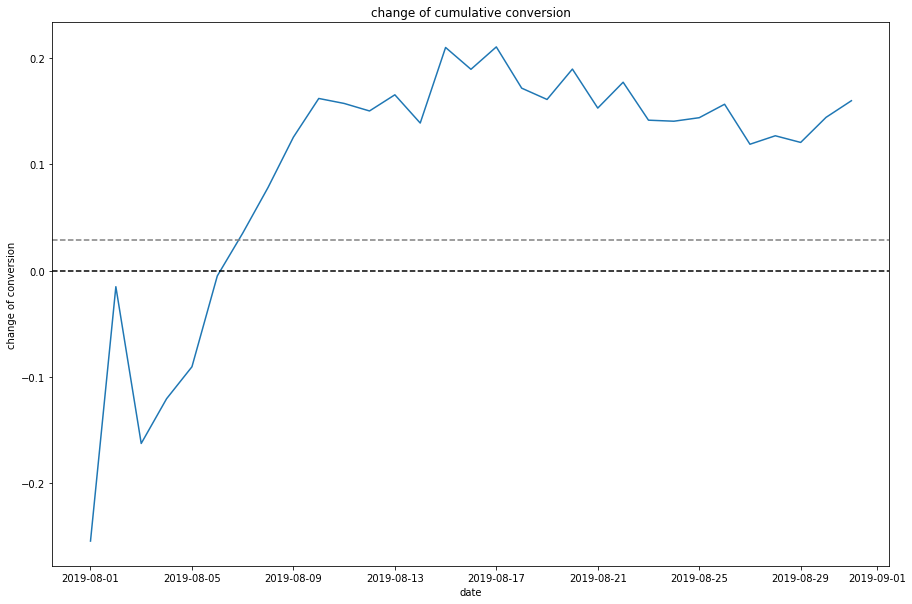

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date',
                                                                           right_on='date', 
                                                                           how='left',
                                                                           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.029, color='grey', linestyle='--')
plt.title('change of cumulative conversion')
plt.xlabel('date')
plt.ylabel('change of conversion')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6]) 
plt.show()

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя, поэтому сперва стоит проанализировать аномалии, возможно, они изменят картину

### Точечный график количества заказов по пользователям

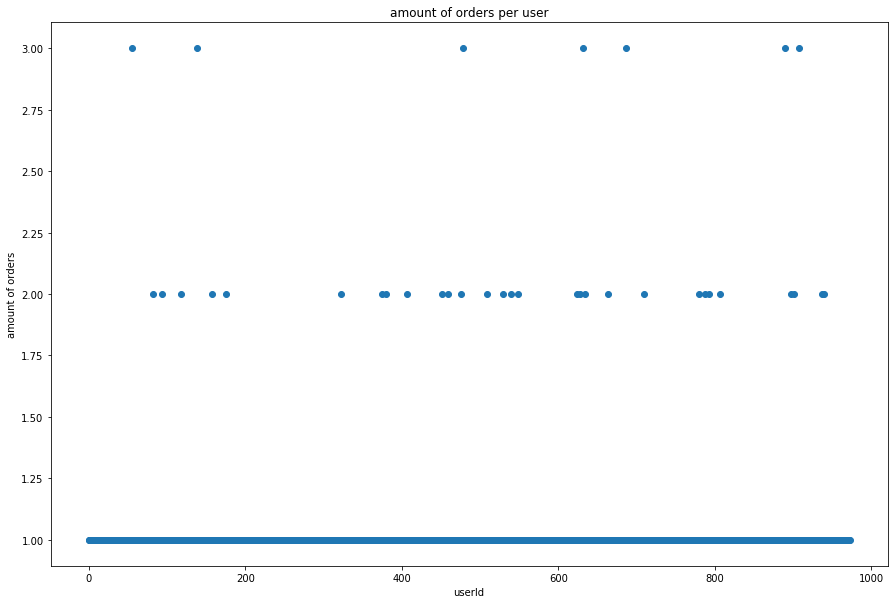

In [16]:
orders_count = df_orders.groupby('visitorId')['transactionId'].count()
orders_count = orders_count.reset_index()
orders_count.columns = ['visitor', 
                        'numper_of_orders']

x_values = pd.Series(range(0,len(orders_count['numper_of_orders'])))
plt.scatter(x_values, orders_count['numper_of_orders'])
plt.title('amount of orders per user')
plt.xlabel('userId')
plt.ylabel('amount of orders')
plt.show()

**Вывод:**

С учетом удаления пользователей, которые входили в обе группы, получили, что количесвто всех заказов лежит в пределах 1-2 заказов на пользователя, однако есть и такие пользователи, кто имеет больше заказов. 

###  95-й и 99-й перцентили количества заказов на пользователя

In [17]:
print(np.percentile(orders_count['numper_of_orders'], [95, 99])) 

[1. 2.]


**Вывод:**

Не более 5% пользователей имеют 1 заказ и не более 1% имеют 2. Определим границей аномальных заказов количество заказов равное двум. 

### Точечный график стоимостей заказов

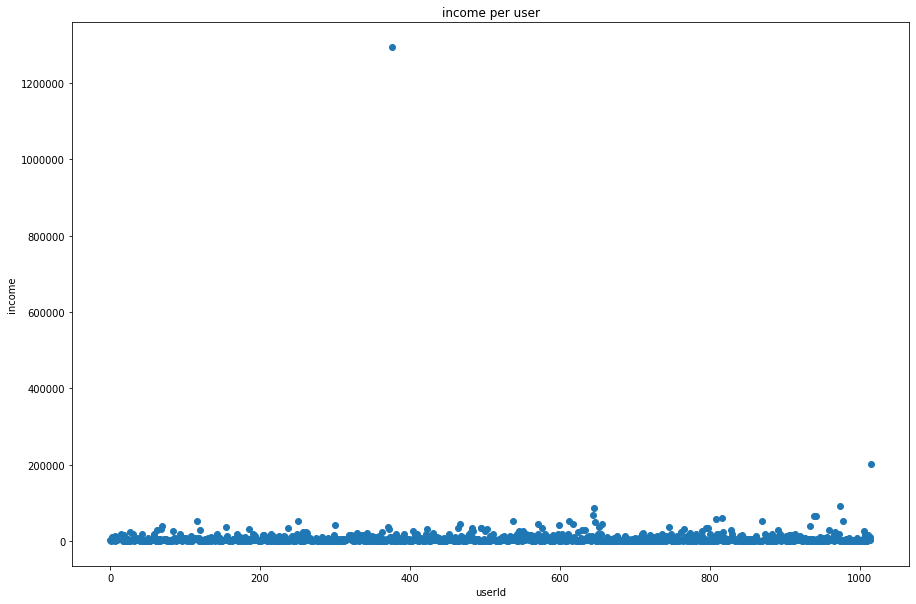

In [18]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
plt.title('income per user')
plt.xlabel('userId')
plt.ylabel('income')
plt.show()

**Вывод:**

В основном все заказы дешевле 200 тысяч, однако есть два заказа, сильно выбивающихся из общей картины, один из которых по своей стоимости может покрыть несколько обычных заказов вместе взятых. 

### 95-й и 99-й перцентили стоимости заказов

In [19]:
print(np.percentile(df_orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод:**

Не более 5% заказов по стоимости составляют 28000 и не более 1% составляю 58233.2. Определим границей аномальных заказов стоимость заказа равную 58233.2

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Для начала подготовим таблицу *data*, которую будем использовать для анализа показателей

In [20]:
visitorsADaily = df_visits[df_visits['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = df_visits[df_visits['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Теперь можно перейти к подсчету статистической значимости различия в конверсии между группами.

Определим нулевую гипотезу: Конверсии между группами равны

Определим альтернативнуб гипотезу: Конверсии между группами не равны

In [21]:
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


**Вывод:**

По «сырым» данным есть различия в конверсии групп A и B, так как p-value меньше, чем 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 16%.

### Статистическая значимость различий среднего чека между группами по «сырым» данным

Определим нулевую гипотезу: средние чеки по группам равны

Определим альтернативную гипотезу: средние чеки по группам не равны

In [22]:
print('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], 
                                          df_orders[df_orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


**Вывод:**

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Сначала узнаем сколько всего аномальных пользователей. 

In [23]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape) 

(16,)


Всего таких пользователей 16, теперь можно перейти к подсчету разницы конверсий уже по отчищенным данным.

Нулевая и альтернативная гипотезы остаются прежними. 

In [24]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.189


Результаты по конверсии практически не изменились.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая и альтернативная гипотезы остаются прежними.

In [25]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'A',
                    np.logical_not(df_orders['visitorId'].isin(abnormalUsers))
                )
            ]['revenue'],
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'B',
                    np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided'
        )[1]
    )
)

print(
    "{0:.3f}".format(
        df_orders[
            np.logical_and(
                df_orders['group'] == 'B',
                np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / df_orders[
            np.logical_and(
                df_orders['group'] == 'A',
                np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.788
-0.032


**Вывод:**

P-value уменьшился, но это никак не повлияло на результат. 

В целом общие выводы по результатам теста не изменились

### Вывод:

Имеющиеся факты:
- Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A;
- График различия среднего чека говорит о том, что результаты группы B в целом сильно увеличились, но потом начали ухудшаться день ото дня:

Группа B почти по всем показателям лучше группы А, особенно если говорить о конверсии. В целом показатели кумулятивных метрик установились и вряд ли сильно изменятся, поэтому рекомендуется остановить тест и признать группу B лучше, чем A. 

## Общий вывод:

По итогам предобработки было обнаружено, что есть пользователи, которые попали сразу в две группы, это недопустимо, и следуют проработать это проблему более детально, чтоб не нарушалась чистота эксперемента. 

После приоритизации гипотез выяснелось, что наиболее важными гипотезами по фреймворку *RICE* оказались "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с индексом 7, "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"с индексом 2, "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с индексом 0, а по *ICE*: "Запустить акцию, дающую скидку на товар в день рождения" с индексом 8, "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с индексом 0, "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" с индексом 7. Как мне кажется, лучше опираться на *RICE*, потому что он включает параметр *Reach*, который отвечает за охват, что несомненно очень важно. 

Результаты A/B-теста показали, что по конверсии группа B лучше группы A, в средних чеках особой разницы не наблюдается, рекомендуется: остановаить тест, так как вряд ли произойдут какие либо еще изменения, а также признать группу B победителем. 

Можно предположить, что победа группы B означает рост числа заказов, потому что средний чек не упал, а конверсия выросла. 